<a href="https://colab.research.google.com/github/vamshivarma123/redeem-assinements/blob/main/redeem_ass_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset from sklearn
iris = load_iris(as_frame=True)
df = iris.frame  # pandas DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
print(df.isnull().sum())
df = df.dropna()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [3]:
df['target'] = df['target'].astype('category')
df['target'] = df['target'].cat.rename_categories(iris.target_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])  # only numeric cols
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)
scaled_df['target'] = df['target']
scaled_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


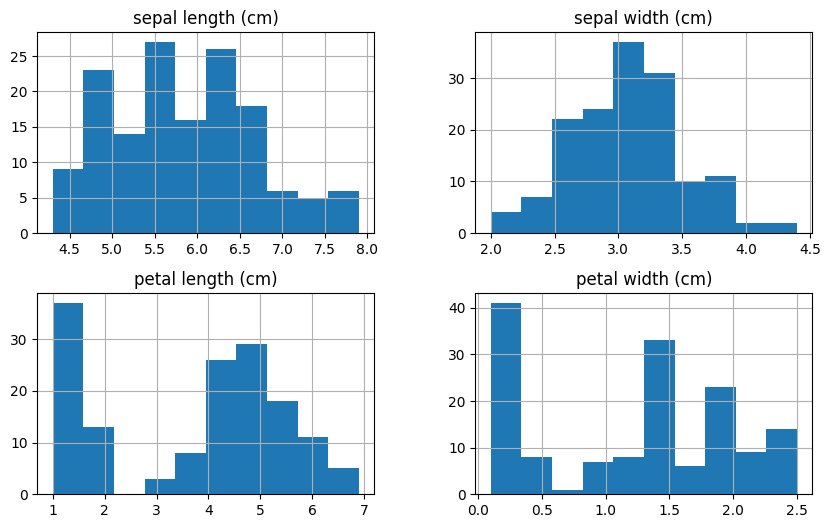

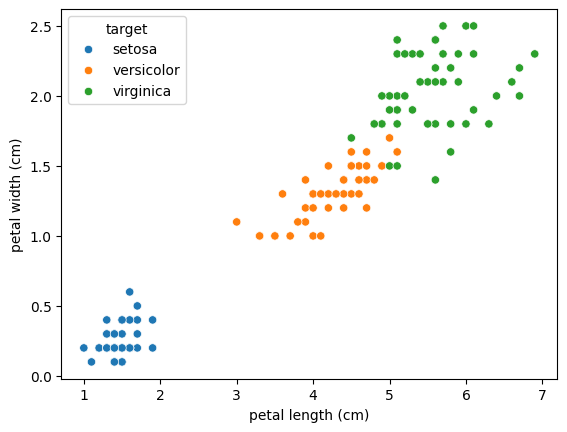

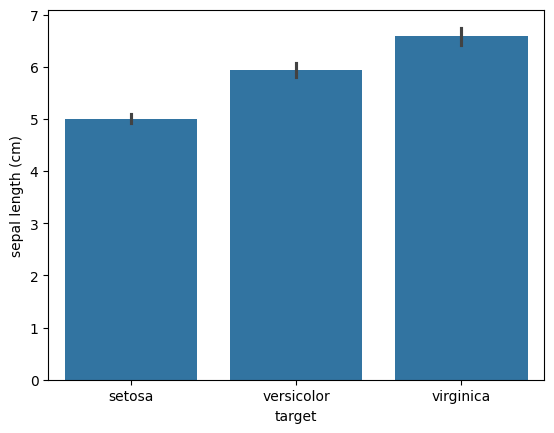

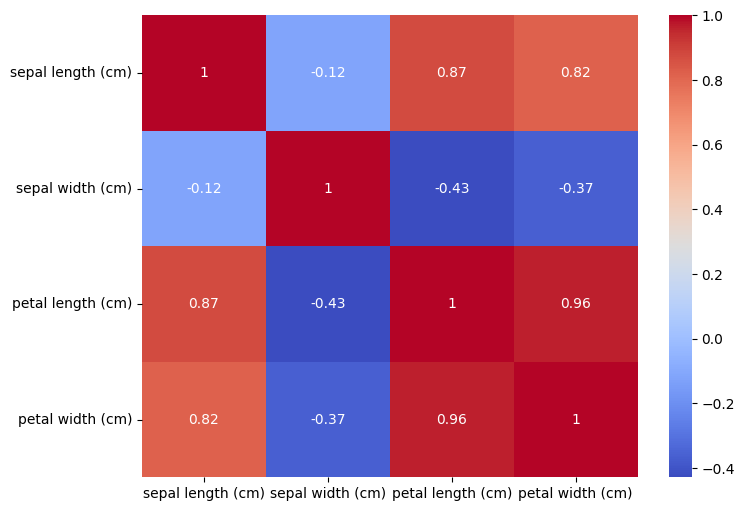

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df.iloc[:, :-1].hist(figsize=(10,6))
plt.show()

sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=df)
plt.show()

sns.barplot(x="target", y="sepal length (cm)", data=df)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop("target", axis=1)
y = scaled_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (120, 4)
Test shape: (30, 4)
